In [28]:
# Testing the efficiency of PCA in noise reduction using Artificial Neural Networks

In [29]:
import numpy as np
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
from matplotlib import pyplot as plt

In [30]:
def func1(arr):
    # function being deployed: f(x,y,z,...) = sqrt(2 * (x^4 + y^4 + z^4...))
    ans = 0
    for i in range(arr.shape[0]):
        ans += arr[i]**4
    return np.sqrt(ans * 2)

def noisifyData(cleanData, noiseRange):
    noiseAdded = np.random.rand(*cleanData.shape)
    noiseAdded = noiseAdded*2 - 1
    noiseAdded = noiseAdded * noiseRange
    return cleanData + noiseAdded

In [31]:
# a = np.random.rand(5,4)
# b = np.random.rand(4)
# print(a)
# print(b)
# print(a*b)

In [32]:
data = np.random.rand(20000,5)

In [33]:
data

array([[0.811178  , 0.61649011, 0.29267977, 0.06802061, 0.01263808],
       [0.74104743, 0.02546852, 0.23771048, 0.72252155, 0.20196171],
       [0.93287756, 0.02522082, 0.61838285, 0.99274378, 0.24647663],
       ...,
       [0.33243435, 0.91251592, 0.37813229, 0.14679567, 0.26486621],
       [0.83950968, 0.96755668, 0.97353183, 0.21057931, 0.67059952],
       [0.78530854, 0.19332585, 0.57691519, 0.60872021, 0.27429843]])

In [34]:
data.mean(axis = 0)

array([0.4988503 , 0.50006875, 0.49772546, 0.49905736, 0.49770632])

In [35]:
# func1(data[0])

In [36]:
y = np.random.rand(data.shape[0])
for i in range(data.shape[0]):
    y[i] = func1(data[i])


In [37]:
noise = [0.1,0.2,0.1,0.15,0.1]

noisyData = np.array(data, copy = True)

noisyData = noisifyData(noisyData, noise)

In [38]:
noisyData.shape

(20000, 5)

In [39]:
noisyData.mean(axis = 0)

array([0.49890634, 0.49921182, 0.49757306, 0.49924163, 0.4972441 ])

In [40]:
np.std(data, axis = 0)

array([0.28812418, 0.28948125, 0.28916731, 0.29126248, 0.2884733 ])

In [41]:
np.std(noisyData, axis = 0)

array([0.2934305 , 0.31163868, 0.29556281, 0.30365417, 0.29455816])

In [42]:
noisyY = np.random.rand(noisyData.shape[0])
for i in range(noisyData.shape[0]):
    noisyY[i] = func1(noisyData[i])


In [43]:
diff = y-noisyY
print(diff)

[ 0.11249564 -0.07997417  0.21928494 ... -0.46621081 -0.30431108
 -0.2044702 ]


In [44]:
cleanModel = tf.keras.Sequential()
cleanModel.add(Input(shape = (5,)))
cleanModel.add(Dense(10, activation = 'tanh'))
cleanModel.add(Dense(5))
cleanModel.add(Dense(1))
print(cleanModel.output_shape)

(None, 1)


In [45]:
cleanModel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [46]:
cleanModel.compile(optimizer ='rmsprop', loss = tf.keras.losses.MeanSquaredError())
historyCl = cleanModel.fit(data, y, validation_split = 0.1, epochs = 30)

Train on 18000 samples, validate on 2000 samples
Epoch 1/30
18000/18000 [==============================] - 1s 40us/sample - loss: 0.1575 - val_loss: 0.0530
Epoch 2/30
18000/18000 [==============================] - 1s 29us/sample - loss: 0.0518 - val_loss: 0.0481
Epoch 3/30
18000/18000 [==============================] - 1s 29us/sample - loss: 0.0486 - val_loss: 0.0467
Epoch 4/30
18000/18000 [==============================] - 1s 29us/sample - loss: 0.0462 - val_loss: 0.0436
Epoch 5/30
18000/18000 [==============================] - 1s 28us/sample - loss: 0.0440 - val_loss: 0.0416
Epoch 6/30
18000/18000 [==============================] - 1s 29us/sample - loss: 0.0421 - val_loss: 0.0424
Epoch 7/30
18000/18000 [==============================] - 1s 28us/sample - loss: 0.0402 - val_loss: 0.0401
Epoch 8/30
18000/18000 [==============================] - 1s 30us/sample - loss: 0.0383 - val_loss: 0.0364
Epoch 9/30
18000/18000 [==============================] - 1s 28us/sample - loss: 0.0362 - val_l

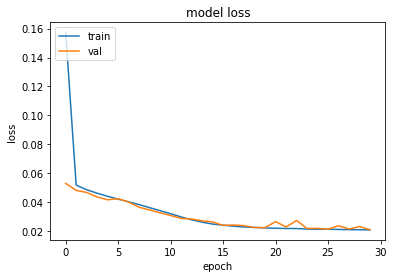

In [47]:
plt.plot(historyCl.history['loss'])
plt.plot(historyCl.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [48]:
testingIndex = 15

print(cleanModel.predict(np.reshape(data[testingIndex], (1,5))))
print(y[testingIndex])

[[1.7642298]]
1.6688720304003373


In [49]:
noisyModel = tf.keras.Sequential()
noisyModel.add(Input(shape = (5,)))
noisyModel.add(Dense(10, activation = 'tanh'))
noisyModel.add(Dense(5))
noisyModel.add(Dense(1))
noisyModel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [50]:
noisyModel.compile(optimizer ='rmsprop', loss = tf.keras.losses.MeanSquaredError())
historyN = noisyModel.fit(noisyData, y, validation_split = 0.1, epochs = 30)

Train on 18000 samples, validate on 2000 samples
Epoch 1/30
18000/18000 [==============================] - 1s 40us/sample - loss: 0.1096 - val_loss: 0.0580
Epoch 2/30
18000/18000 [==============================] - 1s 29us/sample - loss: 0.0605 - val_loss: 0.0580
Epoch 3/30
18000/18000 [==============================] - 0s 27us/sample - loss: 0.0587 - val_loss: 0.0546
Epoch 4/30
18000/18000 [==============================] - 1s 28us/sample - loss: 0.0570 - val_loss: 0.0539
Epoch 5/30
18000/18000 [==============================] - 1s 30us/sample - loss: 0.0555 - val_loss: 0.0535
Epoch 6/30
18000/18000 [==============================] - 1s 29us/sample - loss: 0.0544 - val_loss: 0.0515
Epoch 7/30
18000/18000 [==============================] - 1s 29us/sample - loss: 0.0530 - val_loss: 0.0492
Epoch 8/30
18000/18000 [==============================] - 0s 28us/sample - loss: 0.0513 - val_loss: 0.0482
Epoch 9/30
18000/18000 [==============================] - 1s 30us/sample - loss: 0.0495 - val_l

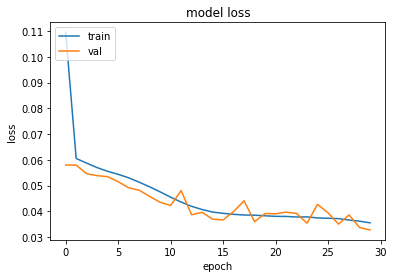

In [51]:
plt.plot(historyN.history['loss'])
plt.plot(historyN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

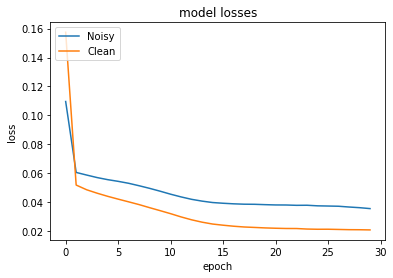

In [52]:
plt.plot(historyN.history['loss'])
plt.plot(historyCl.history['loss'])
plt.title('model losses')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Noisy', 'Clean'], loc='upper left')
plt.show()

In [53]:
np.std(y)

0.45174533958957763